In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import keras
import tensorflow as tf
from keras import backend as K
from keras import metrics
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import AUC
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
#upload kaggle.json
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"fomortiis","key":"8f0018858ffa8fdf75261df919f88339"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 65 Apr 29 06:18 kaggle.json


In [ ]:
!pip3 install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                           Netflix Movies and TV Shows                        1MB  2024-04-10 09:48:38           7744        153  1.0              
aniketmahajan1104/indian-cities-electricity-consumption-2017-19  Indian Cities Electricity Consumption 2017-19      2KB  2024-04-24 09:34:25            644         23  1.0              
jaceprater/smokers-health-data                                   Smoker's Health Data                              29KB  2024-04-20 17:09:38           1504         25  1.0              
mexwell/heart-disease-dataset                                    🫀 Hea

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:23<00:00, 194MB/s]
100% 2.29G/2.29G [00:23<00:00, 107MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import os
import random
import numpy as np
import tensorflow as tf

# Set a seed value
seed_value = 42

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)

# 5. For layers that introduce randomness like dropout, make sure to set seed values
# For example, if you're using a dropout layer:
# model.add(tf.keras.layers.Dropout(0.25, seed=seed_value))

# 6. Configure a new global `tensorflow` session
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


In [ ]:
path = "/content/chest_xray"
train_path = path + "/train/"
val_path = path + "/val/"
test_path = path + "/test/"

In [ ]:
hyper_dimension = 64
hyper_batch_size = 128
hyper_epochs = 100
hyper_channels = 1
hyper_mode = 'grayscale'

## Generate batches of image data (train, validation, and test) with data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(directory = train_path,
                                                    target_size = (hyper_dimension, hyper_dimension),
                                                    batch_size = hyper_batch_size,
                                                    color_mode = hyper_mode,
                                                    class_mode = 'binary',
                                                    seed = 42)
val_generator = val_datagen.flow_from_directory(directory = val_path,
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)
test_generator = test_datagen.flow_from_directory(directory = test_path,
                                                 target_size = (hyper_dimension, hyper_dimension),
                                                 batch_size = hyper_batch_size,
                                                 class_mode = 'binary',
                                                 color_mode = hyper_mode,
                                                 shuffle=False,
                                                 seed = 42)

test_generator.reset()

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
cnn = Sequential()
cnn.add(InputLayer(input_shape=(hyper_dimension, hyper_dimension, hyper_channels)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())

cnn.add(Dense(activation='relu', units=128))
cnn.add(Dense(activation='sigmoid', units=1))

cnn.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[AUC()])
cnn_model = cnn.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs = 200,
                              validation_data = val_generator,
                              validation_steps = len(val_generator),
                              verbose=2)

<ipython-input-16-ef99b4c0566b>:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(train_generator,


Epoch 1/200
41/41 - 59s - loss: 0.5712 - auc: 0.5656 - val_loss: 0.6978 - val_auc: 0.6250 - 59s/epoch - 1s/step
Epoch 2/200
41/41 - 63s - loss: 0.4173 - auc: 0.8556 - val_loss: 0.6216 - val_auc: 0.8438 - 63s/epoch - 2s/step
Epoch 3/200
41/41 - 57s - loss: 0.2611 - auc: 0.9454 - val_loss: 0.4911 - val_auc: 0.8906 - 57s/epoch - 1s/step
Epoch 4/200
41/41 - 57s - loss: 0.2403 - auc: 0.9529 - val_loss: 0.4932 - val_auc: 0.8750 - 57s/epoch - 1s/step
Epoch 5/200
41/41 - 55s - loss: 0.2067 - auc: 0.9654 - val_loss: 0.6668 - val_auc: 0.8828 - 55s/epoch - 1s/step
Epoch 6/200
41/41 - 54s - loss: 0.2328 - auc: 0.9559 - val_loss: 0.6371 - val_auc: 0.8438 - 54s/epoch - 1s/step
Epoch 7/200
41/41 - 55s - loss: 0.1917 - auc: 0.9701 - val_loss: 0.7939 - val_auc: 0.8359 - 55s/epoch - 1s/step
Epoch 8/200
41/41 - 54s - loss: 0.1983 - auc: 0.9684 - val_loss: 0.5516 - val_auc: 0.8125 - 54s/epoch - 1s/step
Epoch 9/200
41/41 - 55s - loss: 0.1846 - auc: 0.9714 - val_loss: 0.6020 - val_auc: 0.7812 - 55s/epoch - 

In [ ]:
def create_charts(cnn, cnn_model):
    ## DEFINE ##
    ## Define 1:  train & validation loss
    train_loss = cnn_model.history['loss']
    val_loss = cnn_model.history['val_loss']

    ## Define 2: train & validation AUC
    train_auc_name = list(cnn_model.history.keys())[3]
    val_auc_name = list(cnn_model.history.keys())[1]
    train_auc = cnn_model.history[train_auc_name]
    val_auc = cnn_model.history[val_auc_name]

    ## Define 3: y_pred & y_true
    y_true = test_generator.classes
    Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))
    y_pred = (Y_pred > 0.5).T[0]
    y_pred_prob = Y_pred.T[0]

    ## PLOT ##
    fig = plt.figure(figsize=(13, 10))

    ## PLOT 1: TRAIN VS. VALIDATION LOSS
    plt.subplot(2,2,1)
    plt.title("Training vs. Validation Loss")
    plt.plot(train_loss, label='training loss')
    plt.plot(val_loss, label='validation loss')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 2: TRAIN VS. VALIDATION AUC
    plt.subplot(2,2,2)
    plt.title("Training vs. Validation AUC Score")
    plt.plot(train_auc, label='training auc')
    plt.plot(val_auc, label='validation auc')
    plt.xlabel("Number of Epochs", size=14)
    plt.legend()

    ## PLOT 3: CONFUSION MATRIX
    plt.subplot(2,2,3)
      # Set up the labels for in the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(names, percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ticklabels = ['Normal', 'Pneumonia']

      # Create confusion matrix as heatmap
    sns.set(font_scale = 1.4)
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Oranges', xticklabels=ticklabels, yticklabels=ticklabels )
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.title("Confusion Matrix") #plt.title("Confusion Matrix\n", fontsize=10)
    plt.xlabel("Predicted", size=14)
    plt.ylabel("Actual", size=14)
    #plt.savefig('cm.png', transparent=True)

    ## PLOT 4: ROC CURVE
    plt.subplot(2,2,4)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    auc = roc_auc_score(y_true, y_pred_prob)
    plt.title('ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label = "Random (AUC = 50%)")
    plt.plot(fpr, tpr, label='CNN (AUC = {:.2f}%)'.format(auc*100))
    plt.xlabel('False Positive Rate', size=14)
    plt.ylabel('True Positive Rate', size=14)
    plt.legend(loc='best')
    #plt.savefig('roc.png', bbox_inches='tight', pad_inches=1)

    ## END PLOTS
    plt.tight_layout()

    ## Summary Statistics
    TN, FP, FN, TP = cm.ravel() # cm[0,0], cm[0, 1], cm[1, 0], cm[1, 1]
    accuracy = (TP + TN) / np.sum(cm) # % positive out of all predicted positives
    precision = TP / (TP+FP) # % positive out of all predicted positives
    recall =  TP / (TP+FN) # % positive out of all supposed to be positives
    specificity = TN / (TN+FP) # % negative out of all supposed to be negatives
    f1 = 2*precision*recall / (precision + recall)
    stats_summary = '[Summary Statistics]\nAccuracy = {:.2%} | Precision = {:.2%} | Recall = {:.2%} | Specificity = {:.2%} | F1 Score = {:.2%}'.format(accuracy, precision, recall, specificity, f1)
    print(stats_summary)

<ipython-input-17-bbf4254b83b5>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(test_generator, steps = len(test_generator))


[Summary Statistics]
Accuracy = 90.54% | Precision = 88.05% | Recall = 98.21% | Specificity = 77.78% | F1 Score = 92.85%


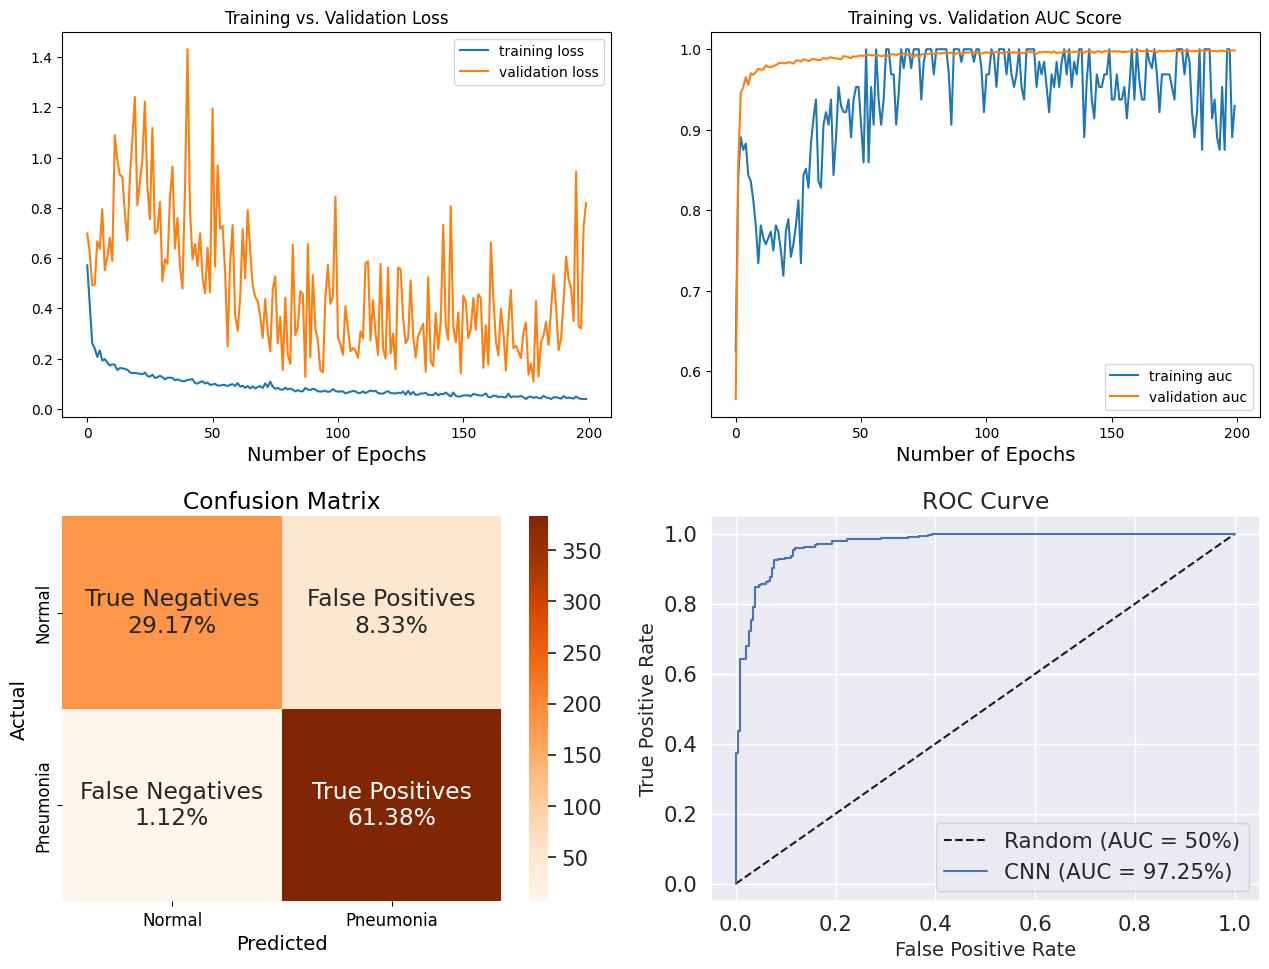

In [ ]:
create_charts(cnn, cnn_model)

In [ ]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
cnn.save('pneumonia.keras')

In [ ]:
!mkdir -p saved_model
saved_model_dir = 'saved_model/my_model'
cnn.save(saved_model_dir)

#Convert the model

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

tflite_model = converter.convert()

#Save the model.
with open('pneumonia.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model



cnn.save("pneumonia.h5") #save your model as a file
#check if your_model.h5 is here with ls command then download
!ls
from google.colab import files
files.download('pneumonia.h5')


chest_xray		  kaggle.json	pneumonia.keras   sample_data
chest-xray-pneumonia.zip  pneumonia.h5	pneumonia.tflite  saved_model


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip /content/saved_model saved_model

  adding: saved_model/ (stored 0%)


In [ ]:
!rm -rf chest_xray/
!rm -rf chest-xray-pneumonia.zip